# Pertanyaan Bisnis

- Bagaimana perbedaan angka kasus aktif antara pulau?
- Bagaimana densitas penduduk memengaruhi tingkat kematian atau pemulihan?

# Importing Library

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Gathering Data

In [2]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


# Exploring Data

In [3]:
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [4]:
data.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


## Data Unique

In [5]:
for col in data.columns:
    print(f"{col} : Number of unique values ( {data[col].nunique()} )")
    print("=====================================")

Date : Number of unique values ( 930 )
Location ISO Code : Number of unique values ( 35 )
Location : Number of unique values ( 35 )
New Cases : Number of unique values ( 2591 )
New Deaths : Number of unique values ( 405 )
New Recovered : Number of unique values ( 2541 )
New Active Cases : Number of unique values ( 2562 )
Total Cases : Number of unique values ( 22951 )
Total Deaths : Number of unique values ( 6419 )
Total Recovered : Number of unique values ( 21124 )
Total Active Cases : Number of unique values ( 8412 )
Location Level : Number of unique values ( 2 )
City or Regency : Number of unique values ( 0 )
Province : Number of unique values ( 34 )
Country : Number of unique values ( 1 )
Continent : Number of unique values ( 1 )
Island : Number of unique values ( 7 )
Time Zone : Number of unique values ( 3 )
Special Status : Number of unique values ( 3 )
Total Regencies : Number of unique values ( 18 )
Total Cities : Number of unique values ( 10 )
Total Districts : Number of uniqu

In [6]:
data = data.drop(['City or Regency'], axis=1)

In [7]:
# Mengecek missing data
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

# Mengecek data duplikat
duplicate_data = data.duplicated().sum()
print("\nJumlah Data Duplikat:", duplicate_data)

Missing Data:
 Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
Longitude              

# Encoding Data

In [8]:
# Melakukan encoding pada kolom yang bersifat kategorikal
label_encoder = LabelEncoder()

# Menentukan kolom mana yang akan di-encode
categorical_columns = ['Island', 'Province']

# Melakukan encoding pada setiap kolom kategorikal
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


# Data Understanding

        Total Cases   Total Deaths  Total Recovered       Island  \
count  3.182200e+04   31822.000000     3.182200e+04  31822.00000   
mean   1.594500e+05    4564.753221     1.492615e+05      3.50839   
std    6.264435e+05   17693.731369     5.958536e+05      2.38853   
min    1.000000e+00       0.000000     0.000000e+00      0.00000   
25%    5.223250e+03     128.000000     3.913500e+03      1.00000   
50%    2.359650e+04     565.500000     2.102750e+04      4.00000   
75%    6.992775e+04    2189.000000     6.414200e+04      6.00000   
max    6.405044e+06  157876.000000     6.218708e+06      7.00000   

       Population Density  
count        31822.000000  
mean           738.894928  
std           2729.431626  
min              8.590000  
25%             47.790000  
50%            103.840000  
75%            262.700000  
max          16334.310000  


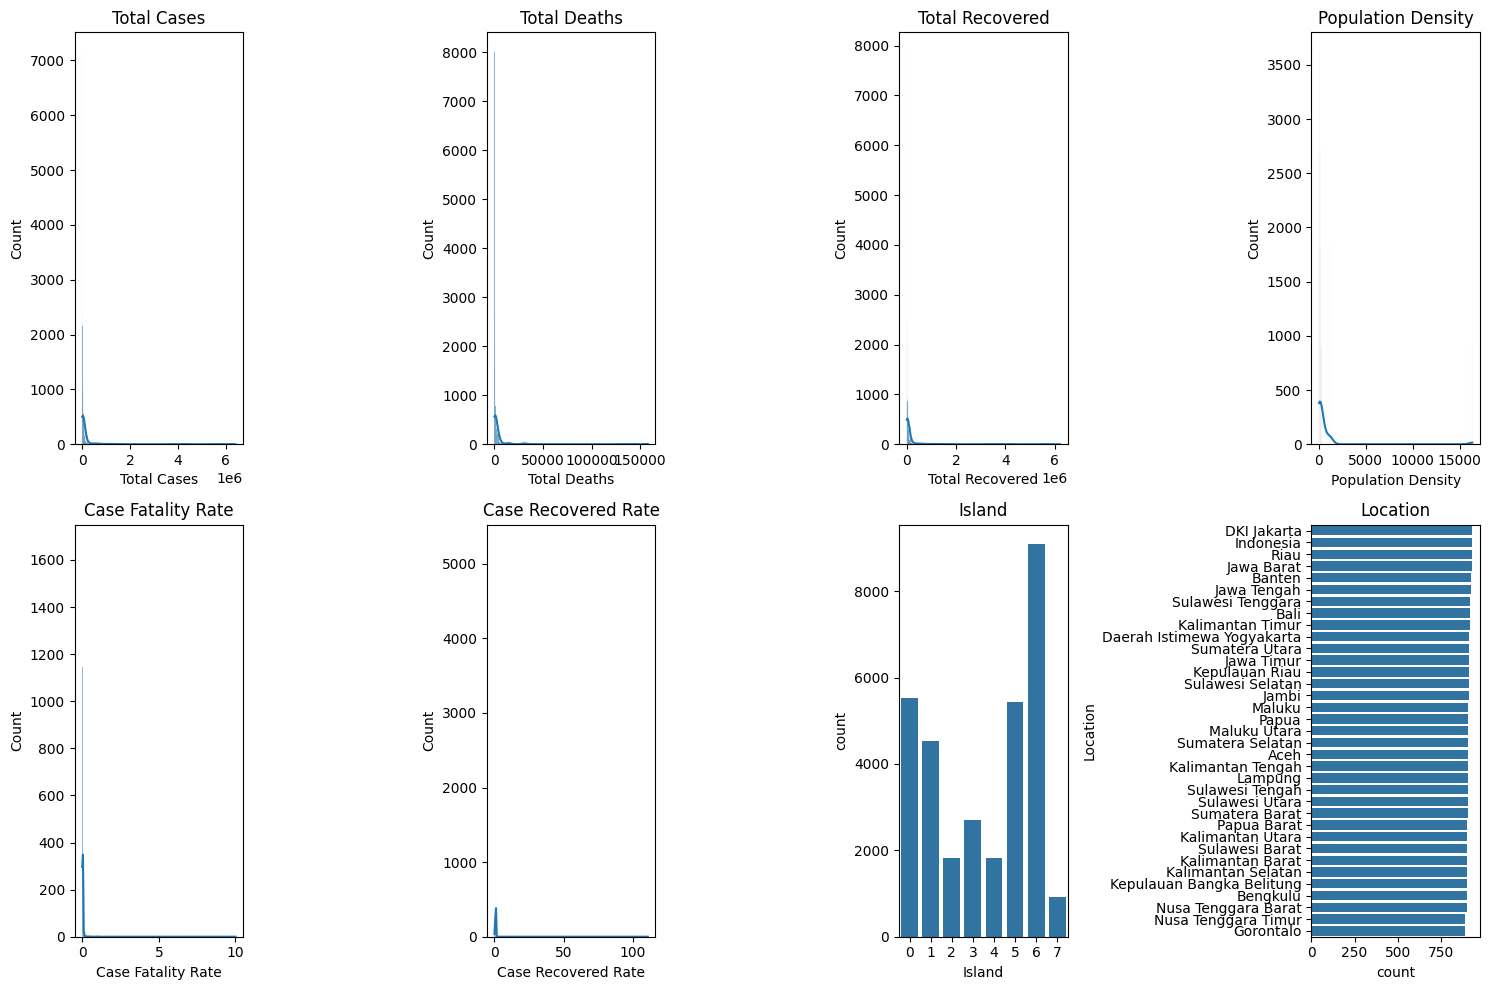

In [13]:
# Memilih kolom yang relevan
columns_of_interest = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Location', 'Island', 'Population Density', 'Case Fatality Rate', 'Case Recovered Rate']
data_subset = data[columns_of_interest]

# Menampilkan statistik deskriptif
print(data_subset.describe())

# Visualisasi distribusi data
plt.figure(figsize=(15, 10))

# Total Cases
plt.subplot(2, 4, 1)
sns.histplot(data['Total Cases'], kde=True)
plt.title('Total Cases')

# Total Deaths
plt.subplot(2, 4, 2)
sns.histplot(data['Total Deaths'], kde=True)
plt.title('Total Deaths')

# Total Recovered
plt.subplot(2, 4, 3)
sns.histplot(data['Total Recovered'], kde=True)
plt.title('Total Recovered')

# Population Density
plt.subplot(2, 4, 4)
sns.histplot(data['Population Density'], kde=True)
plt.title('Population Density')

# Convert percentage strings to floats
data['Case Fatality Rate'] = data['Case Fatality Rate'].str.rstrip('%').astype('float') / 100.0
data['Case Recovered Rate'] = data['Case Recovered Rate'].str.rstrip('%').astype('float') / 100.0

# Case Fatality Rate
plt.subplot(2, 4, 5)
sns.histplot(data['Case Fatality Rate'], kde=True)
plt.title('Case Fatality Rate')

# Case Recovered Rate
plt.subplot(2, 4, 6)
sns.histplot(data['Case Recovered Rate'], kde=True)
plt.title('Case Recovered Rate')

# Island
plt.subplot(2, 4, 7)
sns.countplot(x='Island', data=data)
plt.title('Island')

# Location
plt.subplot(2, 4, 8)
sns.countplot(y='Location', data=data, order=data['Location'].value_counts().index)
plt.title('Location')

plt.tight_layout()
plt.show()

# Data Preparation

In [17]:
# Mengisi nilai yang hilang
data['Total Cases'].fillna(data['Total Cases'].mean(), inplace=True)
data['Total Deaths'].fillna(data['Total Deaths'].mean(), inplace=True)
data['Total Recovered'].fillna(data['Total Recovered'].mean(), inplace=True)
data['Population Density'].fillna(data['Population Density'].mean(), inplace=True)
data['Case Fatality Rate'].fillna(data['Case Fatality Rate'].mean(), inplace=True)
data['Case Recovered Rate'].fillna(data['Case Recovered Rate'].mean(), inplace=True)

# Melakukan encoding pada kolom kategorikal
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Island'] = label_encoder.fit_transform(data['Island'])

# Melakukan normalisasi pada kolom numerik
scaler = StandardScaler()
data[['Total Cases', 'Total Deaths', 'Total Recovered', 'Population Density', 'Case Fatality Rate', 'Case Recovered Rate']] = scaler.fit_transform(data[['Total Cases', 'Total Deaths', 'Total Recovered', 'Population Density', 'Case Fatality Rate', 'Case Recovered Rate']])

data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_3980\658686856.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total Deaths'].fillna(data['Total Deaths'].mean(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_3980\658686856.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,4,2,0,0,2,-0.254474,-0.256861,-0.250378,...,-6.204699,0.18,3.60,0.0,1.84,0.18,3.279586,0.739325,1.326795,1.033834
1,3/2/2020,ID-JK,4,2,0,0,2,-0.254471,-0.256861,-0.250378,...,-6.204699,0.18,3.78,0.0,1.84,0.18,3.105892,0.673579,1.000000,1.000000
2,3/2/2020,IDN,7,2,0,0,2,-0.254533,-0.257991,-0.250504,...,-0.789275,0.01,0.01,0.0,0.00,0.00,-0.283217,-0.608602,1.326795,1.033834
3,3/2/2020,ID-RI,26,1,0,0,1,-0.254535,-0.257991,-0.250502,...,0.511648,0.16,0.16,0.0,0.00,0.00,-0.283217,0.092311,1.326795,1.033834
4,3/3/2020,ID-JK,4,2,0,0,2,-0.254468,-0.256861,-0.250378,...,-6.204699,0.18,3.96,0.0,1.84,0.18,2.948178,0.613931,1.000000,1.000000


## Data scaling

In [20]:
# Melakukan scaling pada data
scaler = StandardScaler()

# Menentukan kolom yang akan di-scale
columns_to_scale = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Population Density', 'Case Fatality Rate', 'Case Recovered Rate']

# Melakukan scaling pada kolom yang telah ditentukan
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Menampilkan data yang telah di-scale
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,4,2,0,0,2,-0.254474,-0.256861,-0.250378,...,-6.204699,0.18,3.60,0.0,1.84,0.18,3.279586,0.739325,1.326795,1.033834
1,3/2/2020,ID-JK,4,2,0,0,2,-0.254471,-0.256861,-0.250378,...,-6.204699,0.18,3.78,0.0,1.84,0.18,3.105892,0.673579,1.000000,1.000000
2,3/2/2020,IDN,7,2,0,0,2,-0.254533,-0.257991,-0.250504,...,-0.789275,0.01,0.01,0.0,0.00,0.00,-0.283217,-0.608602,1.326795,1.033834
3,3/2/2020,ID-RI,26,1,0,0,1,-0.254535,-0.257991,-0.250502,...,0.511648,0.16,0.16,0.0,0.00,0.00,-0.283217,0.092311,1.326795,1.033834
4,3/3/2020,ID-JK,4,2,0,0,2,-0.254468,-0.256861,-0.250378,...,-6.204699,0.18,3.96,0.0,1.84,0.18,2.948178,0.613931,1.000000,1.000000


In [21]:
print(data.describe())

           Location     New Cases    New Deaths  New Recovered  \
count  31822.000000  31822.000000  31822.000000   31822.000000   
mean      16.975552    402.311388      9.920652     390.398498   
std       10.109303   2320.629838     64.139080    2199.878802   
min        0.000000      0.000000      0.000000       0.000000   
25%        8.000000      3.000000      0.000000       2.000000   
50%       17.000000     27.000000      0.000000      20.000000   
75%       26.000000    130.000000      3.000000     123.000000   
max       34.000000  64718.000000   2069.000000   61361.000000   

       New Active Cases   Total Cases  Total Deaths  Total Recovered  \
count      31822.000000  31822.000000  3.182200e+04     31822.000000   
mean           1.992238      0.000000  7.145172e-18         0.000000   
std         1219.513355      1.000016  1.000016e+00         1.000016   
min       -29938.000000     -0.254535 -2.579911e-01        -0.250504   
25%          -12.000000     -0.246198 -2.5075

# Data Visualization

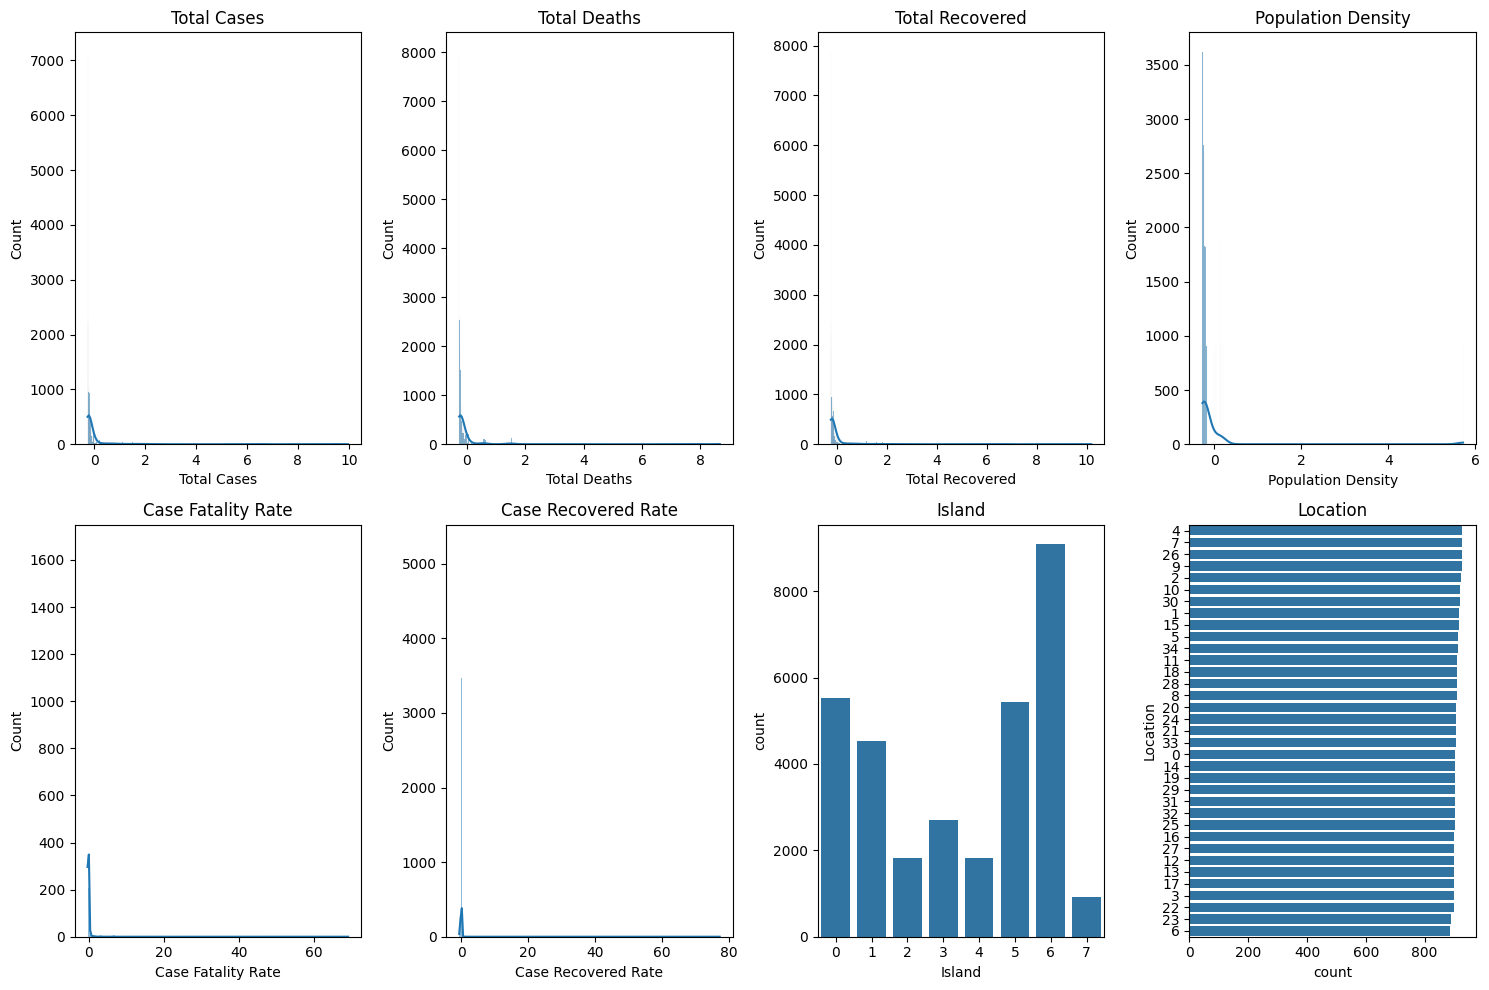

In [22]:
# Visualisasi distribusi data
plt.figure(figsize=(15, 10))

# Total Cases
plt.subplot(2, 4, 1)
sns.histplot(data['Total Cases'], kde=True)
plt.title('Total Cases')

# Total Deaths
plt.subplot(2, 4, 2)
sns.histplot(data['Total Deaths'], kde=True)
plt.title('Total Deaths')

# Total Recovered
plt.subplot(2, 4, 3)
sns.histplot(data['Total Recovered'], kde=True)
plt.title('Total Recovered')

# Population Density
plt.subplot(2, 4, 4)
sns.histplot(data['Population Density'], kde=True)
plt.title('Population Density')

# Case Fatality Rate
plt.subplot(2, 4, 5)
sns.histplot(data['Case Fatality Rate'], kde=True)
plt.title('Case Fatality Rate')

# Case Recovered Rate
plt.subplot(2, 4, 6)
sns.histplot(data['Case Recovered Rate'], kde=True)
plt.title('Case Recovered Rate')

# Island
plt.subplot(2, 4, 7)
sns.countplot(x='Island', data=data)
plt.title('Island')

# Location
plt.subplot(2, 4, 8)
sns.countplot(y='Location', data=data, order=data['Location'].value_counts().index)
plt.title('Location')

plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = data[columns_of_interest]
y = data['Total Cases']

# Melakukan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil pemisahan
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25457, 8)
X_test shape: (6365, 8)
y_train shape: (25457,)
y_test shape: (6365,)


# MSE & R2 score

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Memprediksi data test
y_pred = model.predict(X_test)

# Menghitung mean squared error dan r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 4.577605282249253e-30
R2 Score: 1.0


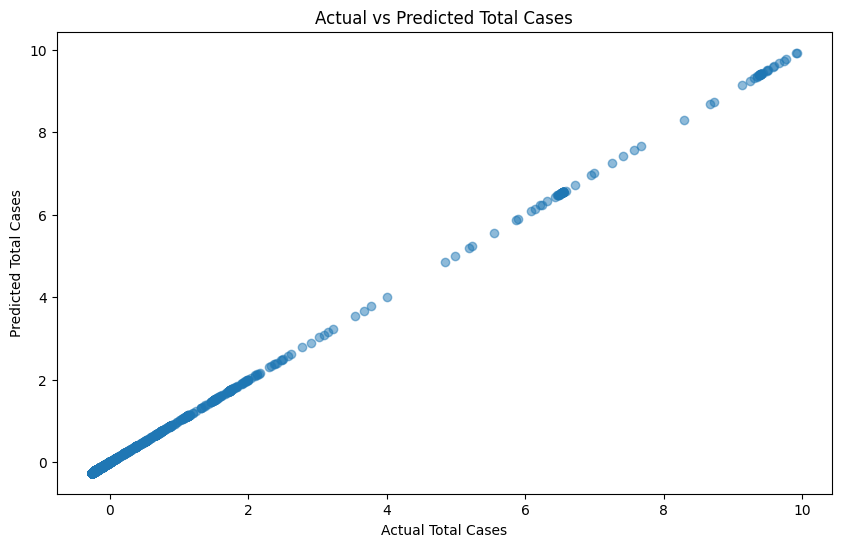

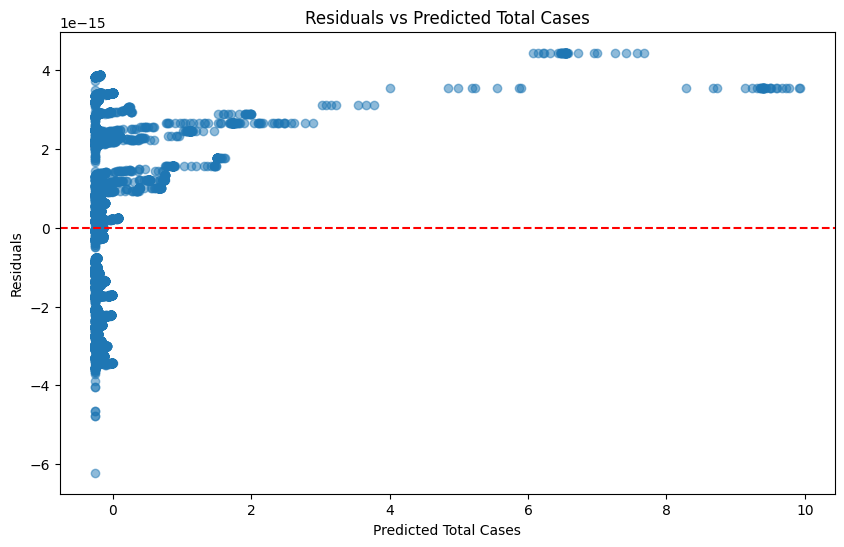

In [25]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Total Cases')
plt.ylabel('Predicted Total Cases')
plt.title('Actual vs Predicted Total Cases')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Total Cases')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Total Cases')
plt.show()

# Unsupervised Learning

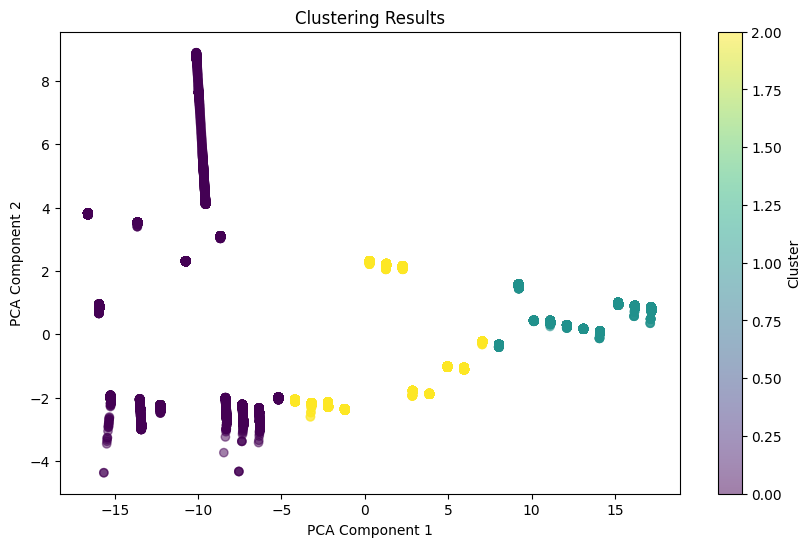

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Menentukan jumlah cluster
num_clusters = 3

# Membuat model KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Melatih model dengan data
kmeans.fit(X)

# Menambahkan label cluster ke data
data['Cluster'] = kmeans.labels_

# Melakukan PCA untuk visualisasi
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

# Supervised Learning

Random Forest Mean Squared Error: 5.054641459809144e-06
Random Forest R2 Score: 0.9999941518886696


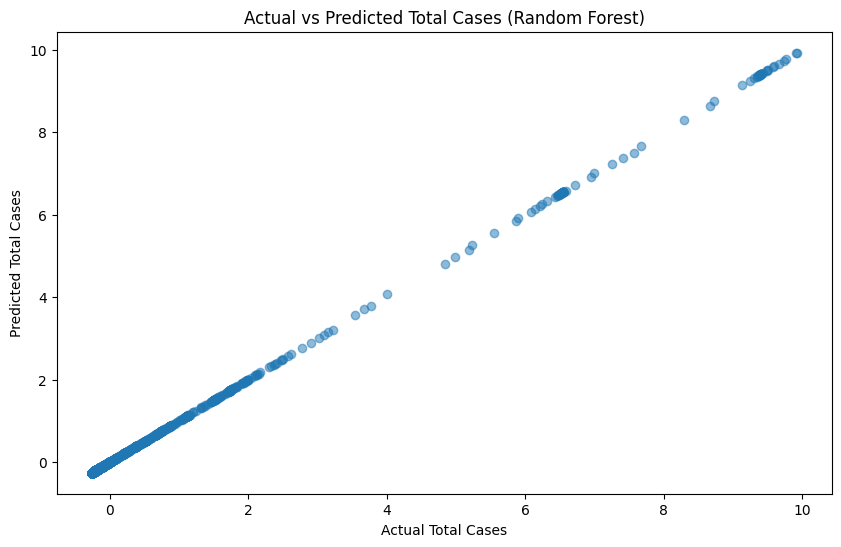

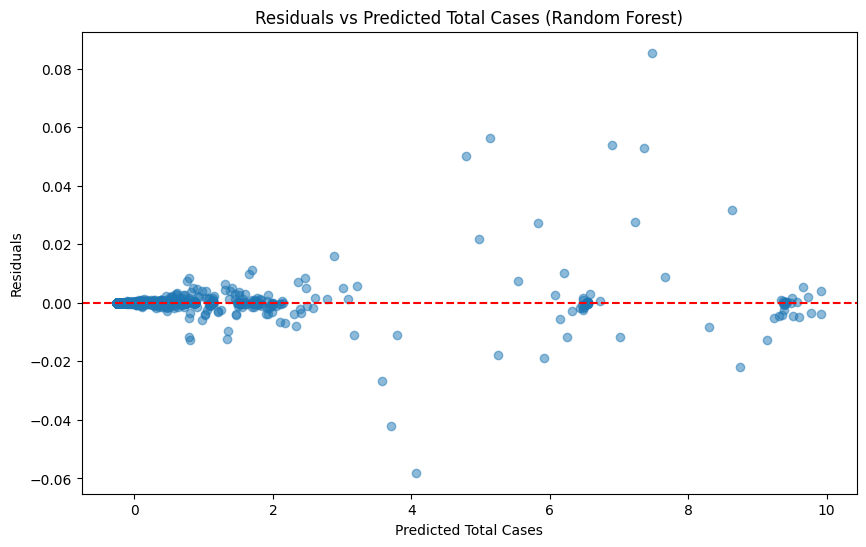

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Membuat model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data training
rf_model.fit(X_train, y_train)

# Memprediksi data test
y_rf_pred = rf_model.predict(X_test)

# Menghitung mean squared error dan r2 score
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R2 Score:", rf_r2)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.5)
plt.xlabel('Actual Total Cases')
plt.ylabel('Predicted Total Cases')
plt.title('Actual vs Predicted Total Cases (Random Forest)')
plt.show()

# Residual plot
rf_residuals = y_test - y_rf_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_rf_pred, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Total Cases')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Total Cases (Random Forest)')
plt.show()